# Quickstart
## Obtaining statistics
In order to obtain statistics from coalescent distributions, we first need to define such a distribution. This is done by creating a {class}`~phasegen.distributions.Coalescent` object which serves as an entry point from which all statistics can be obtained. Below is an example of a simple Kingman coalescent distribution with ``n=10`` lineages, and a single population of constant size 1.

In [1]:
setwd("~/PycharmProjects/PhaseGen/")

Using GitHub PAT from the git credential store.

Skipping install of 'phasegen' from a github remote, the SHA1 (718d8dab) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(phasegen)

pg <- load_phasegen()

Warning message in poetry_config(required_module):
“This project appears to use Poetry for Python dependency management.
However, the 'poetry' command line tool is not available.
reticulate will be unable to activate this project.
Please ensure that 'poetry' is available on the PATH.”


In [3]:
coal <- pg$Coalescent(
    n = 10,
    demography = pg$Demography(
        pop_sizes = 1
    )
)

We can now access various statistics from this distribution which are made available as cached properties of the component distribution of the {class}`~phasegen.distributions.Coalescent` object:

In [4]:
# mean coalescence time or tree height
coal$tree_height$mean

[1] 1.8

In [5]:
# variance of the coalescence time
coal$tree_height$var

[1] 1.158142

In [6]:
# expected total branch length
coal$total_branch_length$mean

[1] 5.657937

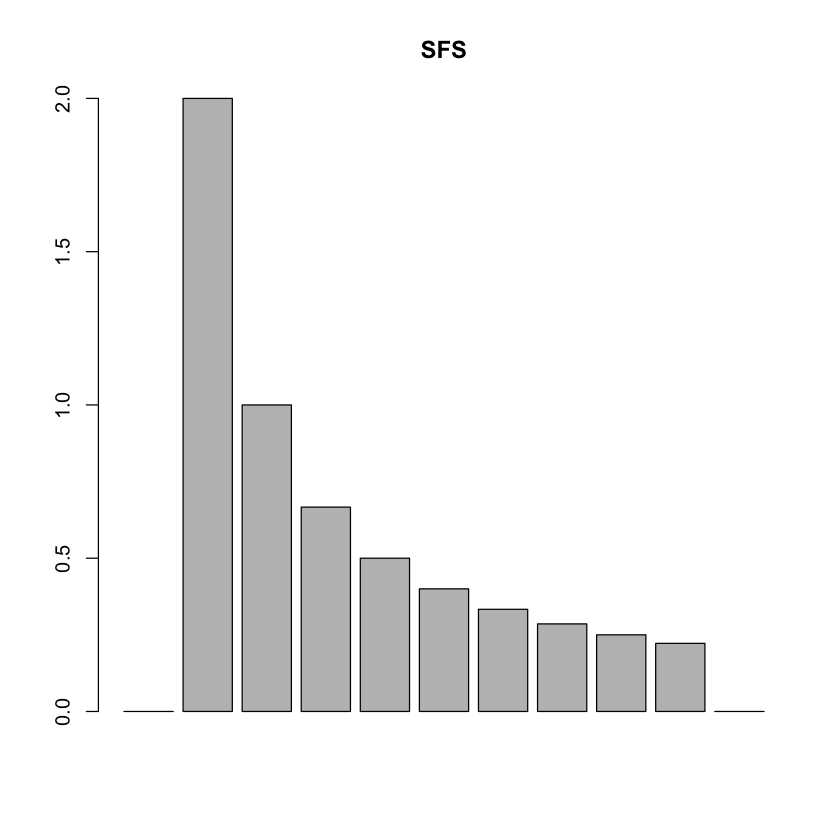

In [7]:
# expected site-frequency spectrum
barplot(coal$sfs$mean$data, main = "SFS")

In fact, `coal.tree_height`, `coal.total_branch_length`, and `coal.sfs` are all {class}`~phasegen.distributions.PhaseTypeDistribution` objects which can be accessed to obtain statistics on these distributions. If you would like to take a closer look at the API reference, these are {class}`~phasegen.distributions.TreeHeightDistribution`, {class}`~phasegen.distributions.PhaseTypeDistribution`, and {class}`~phasegen.distributions.UnfoldedSFSDistribution`, respectively. {class}`~phasegen.distributions.PhaseTypeDistribution` instances support the computation of moments and cross-moments of arbitrary order, which is only limited by the computational burden associated with higher-order moments. {class}`~phasegen.distributions.TreeHeightDistribution` extends {class}`~phasegen.distributions.PhaseTypeDistribution` and offers additional information through the PDF, CDF and quantile function.

In [8]:
coal$tree_height$quantile(0.95)

[1] 3.89325

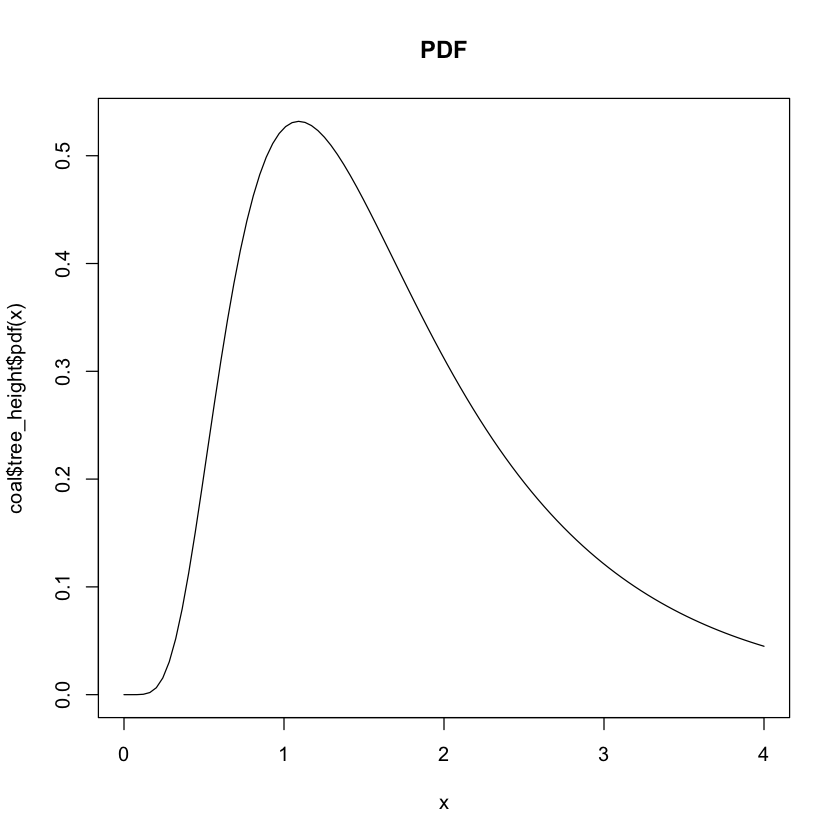

In [9]:
x <- seq(0, 4, length.out = 100)

plot(x, coal$tree_height$pdf(x), type = "l", main = "PDF")

Before we discuss on how to obtain more complex statistics, let us first define a more complex coalescent distribution. Here, we define a two-population coalescent using the {class}`~phasegen.coalescent_models.BetaCoalescent` model, where the population sizes and migration rates are time-dependent. This is done by specifying a {class}`~phasegen.demography.Demography` object, which is configured with a series of {class}`~phasegen.demography.DemographicEvent` objects.

In [10]:
coal <- pg$Coalescent(
    n = pg$LineageConfig(list(pop_0 = 3, pop_1 = 5)),
    model = pg$BetaCoalescent(alpha = 1.7),
    demography = pg$Demography(c(
        pg$PopSizeChange(pop = "pop_0", time = 0, size = 1),
        pg$PopSizeChange(pop = "pop_1", time = 0, size = 1.2),
        pg$PopSizeChange(pop = "pop_1", time = 5, size = 0.1),
        pg$PopSizeChange(pop = "pop_1", time = 5.5, size = 0.8),
        pg$MigrationRateChange(source = "pop_0", dest = "pop_1", time = 0, rate = 0.2),
        pg$MigrationRateChange(source = "pop_0", dest = "pop_1", time = 8, rate = 0.3),
        pg$MigrationRateChange(source = "pop_1", dest = "pop_0", time = 0, rate = 0.5)
    ))
)

We can iterate through the epochs of this demography. Within each {class}`~phasegen.demography.Epoch`, all rates are constant. ``pop_1`` experiences a bottleneck at time 5, and that there is continuous migration between the two populations.

In [11]:
for (epoch in reticulate::iterate(coal$demography$epochs)) {
    print(epoch$to_string())
}

[1] "Epoch(start_time=0, end_time=5, pop_sizes=(pop_0=1, pop_1=1.2), migration_rates=(pop_0->pop_0=0, pop_0->pop_1=0.2, pop_1->pop_0=0.5, pop_1->pop_1=0)"
[1] "Epoch(start_time=5, end_time=5.5, pop_sizes=(pop_0=1, pop_1=0.1), migration_rates=(pop_0->pop_0=0, pop_0->pop_1=0.2, pop_1->pop_0=0.5, pop_1->pop_1=0)"
[1] "Epoch(start_time=5.5, end_time=8, pop_sizes=(pop_0=1, pop_1=0.8), migration_rates=(pop_0->pop_0=0, pop_0->pop_1=0.2, pop_1->pop_0=0.5, pop_1->pop_1=0)"
[1] "Epoch(start_time=8, end_time=inf, pop_sizes=(pop_0=1, pop_1=0.8), migration_rates=(pop_0->pop_0=0, pop_0->pop_1=0.3, pop_1->pop_0=0.5, pop_1->pop_1=0)"


Let's take a look at the density of the underlying {class}`~phasegen.distributions.TreeHeightDistribution`.

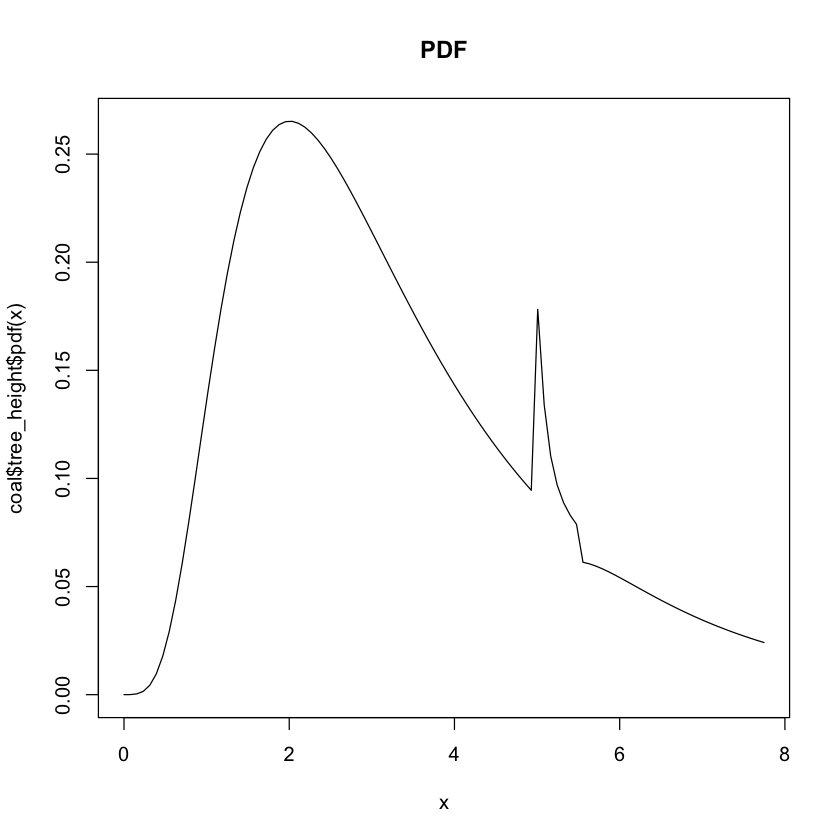

In [12]:
x <- seq(0, coal$tree_height$quantile(0.95), length.out = 100)

plot(x, coal$tree_height$pdf(x), type = "l", main = "PDF");

We can also compute higher-order moments of the SFS, such as the branch length correlation between branches subtending different numbers of lineages in the coalescent tree.

In [13]:
coal$sfs$corr$data

0,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0
0,1.00000000,-0.03204526,-0.1390162,-0.02137022,-0.1400063,-0.01838510,0.72560160,0
0,-0.03204526,1.00000000,-0.1370290,-0.10913252,-0.1264120,0.80364349,-0.13043509,0
0,-0.13901618,-0.13702900,1.0000000,-0.15851912,0.8517271,-0.21133268,-0.16912080,0
0,-0.02137022,-0.10913252,-0.1585191,1.00000000,-0.2324032,-0.13282842,-0.09281145,0
0,-0.14000628,-0.12641201,0.8517271,-0.23240321,1.0000000,-0.19100357,-0.15794423,0
0,-0.01838510,0.80364349,-0.2113327,-0.13282842,-0.1910036,1.00000000,-0.08907693,0
0,0.72560160,-0.13043509,-0.1691208,-0.09281145,-0.1579442,-0.08907693,1.00000000,0
0,0.00000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0


We may also marginalize over a single population. Here we obtain the mean SFS of ``pop_0``, which represents the branch lengths for lineages that subtends ``i`` lineages in the coalescent tree, while spending time in population ``pop_0``.

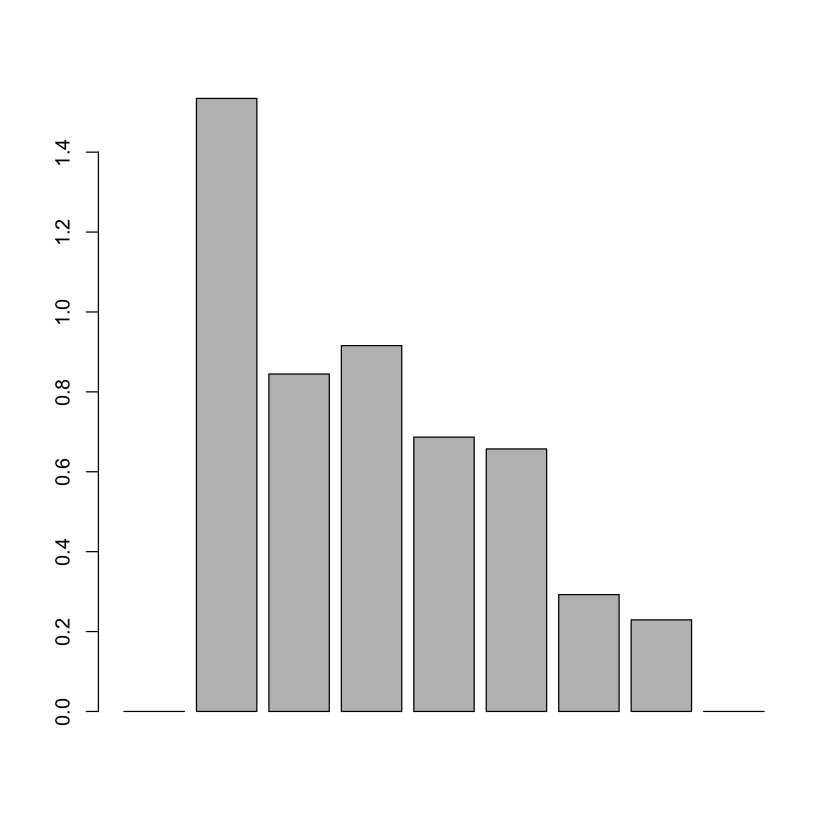

In [14]:
barplot(coal$sfs$demes$demes$pop_0$mean$data)

In the {doc}`rewards` section, you can read more about how to obtain more complex moments by means of specifying rewards.

## Inferring parameters
The availability of exact moments lends itself to gradient-based parameter estimation. This is commonly done based on the SFS, but higher-order moments are also thinkable, provided they can be computed from the data at hand. ``phasegen`` provides a lightweight framework for performing parameter inference which is done by defining an {class}`~phasegen.inference.Inference` object. {class}`~phasegen.inference.Inference` requires a parametrized coalescent distribution, a loss function, and parameter bounds to be specified. More specifically, the `coal` argument is a callable that returns a {class}`~phasegen.distributions.Coalescent` object, based on the parameter values of the current optimization step, and `loss` is a callable specifying the current loss. By default, 10 independent optimization runs are performed using the L-BFGS-B algorithm, and the best result is returned. 

Below we optimize a one-epoch demography with a single population size change where the time of change (``t``) as well as the resulting population size (``Ne``) are variable. The observed summary statistics is an SFS with a sample size of 10, and the loss function is the Poisson likelihood.

```{warning}
Parallelization across multiple cores does not work when using the R interface (hence ``parallelize = FALSE``). This is due to problems when pickling in Python the R callback specified to {class}`~phasegen.inference.Inference`. Problems will also arrive when using {meth}`~phasegen.inference.Inference.to_file` and {meth}`~phasegen.inference.Inference.from_file`.
```

In [15]:
observation = pg$SFS(
    c(177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652)
)

inf = pg$Inference(
    bounds = list(t = c(0, 4), Ne = c(0.1, 1)),
    coal = function(t, Ne) {
        return(pg$Coalescent(
            n = 10,
            demography = pg$Demography(c(
                pg$PopSizeChange(pop = 'pop_0', time = 0, size = 1),
                pg$PopSizeChange(pop = 'pop_0', time = t, size = Ne)
            ))
        ))
    },
    loss = function(coal, x) {
        return(pg$PoissonLikelihood()$compute(
            observed = observation$normalize()$polymorphic,
            modelled = coal$sfs$mean$normalize()$polymorphic
        ))
    },
    parallelize = FALSE
)

Upon construction, the inference object is ready to be optimized and the result can be obtained.

In [16]:
inf$run()

In [17]:
for (epoch in reticulate::iterate(inf$dist_inferred$demography$epochs)) {
    print(epoch$to_string())
}

[1] "Epoch(start_time=0, end_time=0.1455, pop_sizes=(pop_0=1)"
[1] "Epoch(start_time=0.1455, end_time=inf, pop_sizes=(pop_0=0.4814)"


We may also wish to perform parametric bootstrapping. In order to do this, we provide a callback function to resample the data, and set `do_bootstrap = TRUE`. Note that we specify {attr}`~phasegen.inference.Inference.observation` to {class}`~phasegen.inference.Inference`, which is necessary for the resampling to work. Bootstrapping can be parallelized by running multiple optimization runs independently and adding {attr}`~phasegen.inference.Inference.params_inferred` using {meth}`~phasegen.inference.Inference.add_bootstrap`.

```{note}
Note that we explicitly generate random seeds for the resampling function. This is to avoid random number generation issues when running the code through reticulate.
```

In [18]:
inf = pg$Inference(
    bounds = list(t = c(0, 4), Ne = c(0.1, 1)),
    observation = pg$SFS(
        c(177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652)
    ),
    coal = function(t, Ne) {
        return(pg$Coalescent(
            n = 10,
            demography = pg$Demography(c(
                pg$PopSizeChange(pop = 'pop_0', time = 0, size = 1),
                pg$PopSizeChange(pop = 'pop_0', time = t, size = Ne)
            ))
        ))
    },
    loss = function(coal, observation) {
        return(pg$PoissonLikelihood()$compute(
            observed = observation$normalize()$polymorphic,
            modelled = coal$sfs$mean$normalize()$polymorphic
        ))
    },
    resample = function(sfs, x) {
        return(sfs$resample(as.integer(sample(1:1e6, 1))))
    },
    do_bootstrap = TRUE,
    parallelize = FALSE
)

Let's run the inference again and visualize the results.

In [19]:
inf$run()

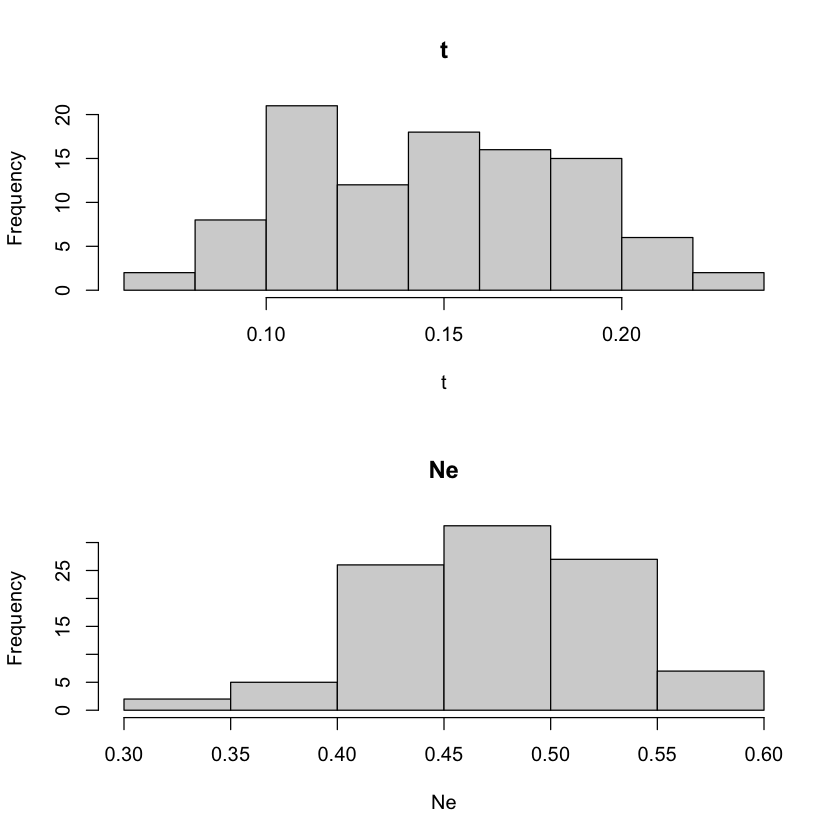

In [20]:
par(mfrow = c(2, 1))
hist(inf$bootstraps$t, xlab = 't', main = 't')
hist(inf$bootstraps$Ne, xlab = 'Ne', main = 'Ne')

You can read more about the inference process in the {doc}`inference` section.